In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [2]:
data1=pd.read_csv('listings.csv')
data2=pd.read_csv('listings2.csv')
data3=pd.read_csv('reviews2.csv')


import the data from Data Preparation + EDA notebook

In [3]:
master=pd.read_csv('price_clean.csv')

In [4]:
master.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
master

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm,label,guests_included_fixed
0,49091,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,...,94.0,f,1.0,0.0,0.0,0.210000,8,0,1,1.0
1,50646,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.27,...,91.0,f,1.0,0.0,0.0,0.411838,12,0,1,2.0
2,56334,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,...,98.0,f,1.0,0.0,0.0,0.389094,9,0,1,1.0
3,71609,East Region,Tampines,1.34541,103.95712,Private room,204,1,15,0.16,...,84.0,t,1.0,275.0,55.0,0.254007,25,0,4,4.0
4,71896,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,...,81.0,t,0.5,138.0,28.0,0.277114,21,0,1,1.0
5,71903,East Region,Tampines,1.34702,103.96103,Private room,103,1,42,0.41,...,88.0,f,0.5,138.0,28.0,0.296756,18,0,1,1.0
6,71907,East Region,Tampines,1.34348,103.96337,Private room,206,1,26,0.26,...,82.0,t,1.0,275.0,69.0,0.273176,19,0,4,4.0
7,241503,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,1.86,...,99.0,f,1.0,200.0,0.0,0.360908,35,0,1,1.0
8,241508,East Region,Bedok,1.32458,103.91163,Private room,54,90,199,2.07,...,99.0,f,1.0,200.0,0.0,0.370017,32,0,1,1.0
9,241510,East Region,Bedok,1.32461,103.91191,Private room,43,90,236,2.51,...,98.0,f,1.0,250.0,0.0,0.351461,33,0,1,1.0


# Content Based from Description

In this part, I will take the text component from data

## Preparation

In [6]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7348 entries, 0 to 7347
Data columns (total 27 columns):
id                                7348 non-null int64
neighbourhood_group               7348 non-null object
neighbourhood                     7348 non-null object
latitude                          7348 non-null float64
longitude                         7348 non-null float64
room_type                         7348 non-null object
price                             7348 non-null int64
minimum_nights                    7348 non-null int64
number_of_reviews                 7348 non-null int64
reviews_per_month                 7348 non-null float64
calculated_host_listings_count    7348 non-null int64
availability_365                  7348 non-null int64
host_is_superhost                 7348 non-null object
property_type                     7348 non-null object
bedrooms                          7348 non-null float64
beds                              7348 non-null float64
guests_include

In [7]:
df1=data2[['id','name','summary','description','last_review']]

In [8]:
df_rec=pd.merge(master, df1, on='id',how='left')

In [9]:
df_beginning=df_rec.copy()

In [10]:
df_rec

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,cleaning_fee,mean,len_amenities,is_cheap_dorm,label,guests_included_fixed,name,summary,description,last_review
0,49091,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,...,0.0,0.210000,8,0,1,1.0,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,2013-10-21
1,50646,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.27,...,0.0,0.411838,12,0,1,2.0,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,Fully furnished bedroom with a nice view on th...,2014-12-26
2,56334,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,...,0.0,0.389094,9,0,1,1.0,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,2015-10-01
3,71609,East Region,Tampines,1.34541,103.95712,Private room,204,1,15,0.16,...,55.0,0.254007,25,0,4,4.0,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,For 3 (Website hidden by Airbnb) room 1&2 and ...,2019-09-07
4,71896,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,...,28.0,0.277114,21,0,1,1.0,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,2019-07-28
5,71903,East Region,Tampines,1.34702,103.96103,Private room,103,1,42,0.41,...,28.0,0.296756,18,0,1,1.0,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.","Like your own home, 24hrs access. Vocational S...",2019-09-22
6,71907,East Region,Tampines,1.34348,103.96337,Private room,206,1,26,0.26,...,69.0,0.273176,19,0,4,4.0,3rd level Jumbo room 5 near EXPO,Vocational Stay Family Suite/Jumbo Bedroom wit...,Vocational Stay Family Suite/Jumbo Bedroom wit...,2019-09-09
7,241503,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,1.86,...,0.0,0.360908,35,0,1,1.0,"Long stay at The Breezy East ""Leopard""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-05-31
8,241508,East Region,Bedok,1.32458,103.91163,Private room,54,90,199,2.07,...,0.0,0.370017,32,0,1,1.0,"Long stay at The Breezy East ""Plumeria""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-09-21
9,241510,East Region,Bedok,1.32461,103.91191,Private room,43,90,236,2.51,...,0.0,0.351461,33,0,1,1.0,"Long stay at The Breezy East ""Red Palm""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-07-31


## Take the text and clustering label

In [11]:
df_rec=df_rec[['id','name','description','last_review','label']]

In [12]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 0 to 7347
Data columns (total 5 columns):
id             7348 non-null int64
name           7347 non-null object
description    7198 non-null object
last_review    4880 non-null object
label          7348 non-null int64
dtypes: int64(2), object(3)
memory usage: 344.4+ KB


## fill na

In [13]:
df_rec['name']=df_rec['name'].fillna('unknown')
df_rec['description']=df_rec['description'].fillna('none')
df_rec['last_review']=df_rec['last_review'].fillna('1990-01-01')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [14]:
df_rec['last_review']=pd.to_datetime(df_rec['last_review'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_rec['label']=df_rec['label'].astype(str)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 0 to 7347
Data columns (total 5 columns):
id             7348 non-null int64
name           7348 non-null object
description    7348 non-null object
last_review    7348 non-null datetime64[ns]
label          7348 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 344.4+ KB


## Make a corpus for name and description

In [17]:
name_corpus = ' '.join(df_rec['name'])
description_corpus = ' '.join(df_rec['description'])

In [18]:
from wordcloud import WordCloud, STOPWORDS

most frequent word from name:

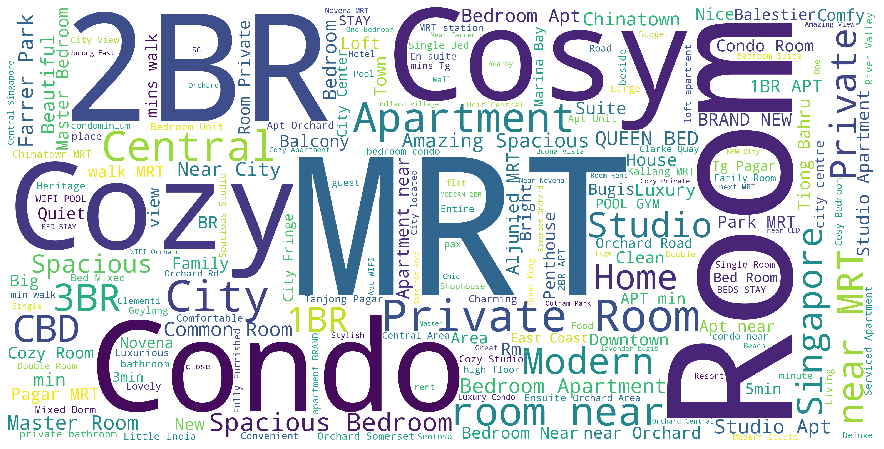

In [19]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

most frequent word from description:

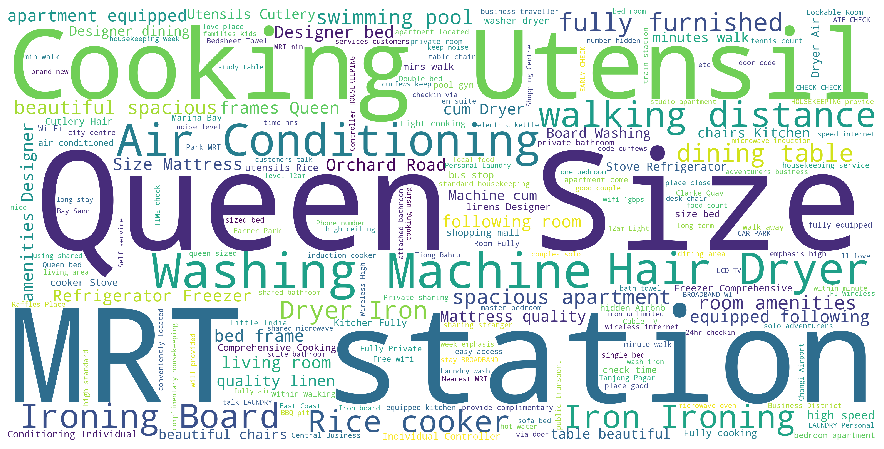

In [20]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

make a new columns which consists the join of name and description

In [21]:
df_rec['join']=df_rec[['name','description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_rec

,id,name,description,last_review,label,join
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,2013-10-21,1,COZICOMFORT LONG TERM STAY ROOM 2 // This is R...
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,2014-12-26,1,Pleasant Room along Bukit Timah // Fully furni...
2,56334,COZICOMFORT,This is Room no. 1. USD700 per month On the fa...,2015-10-01,1,COZICOMFORT // This is Room no. 1. USD700 per ...
3,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,2019-09-07,4,Ensuite Room (Room 1 & 2) near EXPO // For 3 (...
4,71896,B&B Room 1 near Airport & EXPO,Vocational Stay Deluxe Bedroom in Singapore.(N...,2019-07-28,1,B&B Room 1 near Airport & EXPO // Vocational ...
5,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access. Vocational S...",2019-09-22,1,Room 2-near Airport & EXPO // Like your own ho...
6,71907,3rd level Jumbo room 5 near EXPO,Vocational Stay Family Suite/Jumbo Bedroom wit...,2019-09-09,4,3rd level Jumbo room 5 near EXPO // Vocational...
7,241503,"Long stay at The Breezy East ""Leopard""",Stay in a large house with ample living room s...,2019-05-31,1,"Long stay at The Breezy East ""Leopard"" // Stay..."
8,241508,"Long stay at The Breezy East ""Plumeria""",Stay in a large house with ample living room s...,2019-09-21,1,"Long stay at The Breezy East ""Plumeria"" // Sta..."
9,241510,"Long stay at The Breezy East ""Red Palm""",Stay in a large house with ample living room s...,2019-07-31,1,"Long stay at The Breezy East ""Red Palm"" // Sta..."


## Vectorize the data with n gram 1 and 2

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df_rec['join'])

In [25]:
tfidf_matrix.shape

(7348, 142616)

In [26]:
# print(tfidf_matrix)

## Measure the similarity between each listing with cosine similarity

In [27]:
from sklearn.metrics.pairwise import linear_kernel

In [28]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
cosine_similarities.shape

(7348, 7348)

In [30]:
df_similarity_text=pd.DataFrame(cosine_similarities, columns=df_rec['id'], index=df_rec['id'])

In [31]:
df_similarity_text

id,49091,50646,56334,71609,71896,71903,71907,241503,241508,241510,...,38865891,38882577,38882614,38884203,38884435,38885870,38886116,38888083,38889835,38890018
id,,,,,,,,,,,,,,,,,,,,,
49091,1.000000,0.021614,0.344630,0.053041,0.027228,0.028617,0.028486,0.033401,0.031381,0.029757,...,0.027222,0.018323,0.028495,0.017514,0.033292,0.002577,0.017499,0.006434,0.018396,0.022563
50646,0.021614,1.000000,0.017954,0.026766,0.012376,0.011817,0.008295,0.014932,0.014402,0.019109,...,0.010297,0.003742,0.010818,0.012153,0.013396,0.019595,0.012070,0.003603,0.022494,0.008080
56334,0.344630,0.017954,1.000000,0.039569,0.030742,0.029391,0.021342,0.020235,0.020494,0.017383,...,0.020353,0.018743,0.022898,0.010989,0.034043,0.001926,0.010984,0.003915,0.016735,0.023238
71609,0.053041,0.026766,0.039569,1.000000,0.287865,0.265128,0.103539,0.037991,0.017492,0.022684,...,0.017376,0.007776,0.031100,0.011723,0.008536,0.008282,0.011275,0.000000,0.025897,0.003350
71896,0.027228,0.012376,0.030742,0.287865,1.000000,0.861063,0.145549,0.027883,0.026155,0.026838,...,0.021941,0.011199,0.034957,0.014680,0.012733,0.000843,0.014482,0.003427,0.025471,0.005349
71903,0.028617,0.011817,0.029391,0.265128,0.861063,1.000000,0.129934,0.031098,0.029332,0.030056,...,0.024710,0.013896,0.024565,0.019938,0.014552,0.000836,0.020681,0.006261,0.018748,0.004488
71907,0.028486,0.008295,0.021342,0.103539,0.145549,0.129934,1.000000,0.019361,0.018510,0.017009,...,0.010131,0.006422,0.018656,0.007669,0.010762,0.001631,0.006784,0.000000,0.024272,0.003605
241503,0.033401,0.014932,0.020235,0.037991,0.027883,0.031098,0.019361,1.000000,0.718756,0.638894,...,0.021304,0.003491,0.028894,0.014421,0.009709,0.000827,0.014158,0.006722,0.017985,0.003291
241508,0.031381,0.014402,0.020494,0.017492,0.026155,0.029332,0.018510,0.718756,1.000000,0.608645,...,0.020975,0.003437,0.029528,0.011566,0.007633,0.000814,0.011825,0.006618,0.017895,0.003240


the recommendation system from text is done, let's move to next chapter

# Content Based From Cluster

In [32]:
df_cluster=master[['id','label']]

In [33]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7348 entries, 0 to 7347
Data columns (total 2 columns):
id       7348 non-null int64
label    7348 non-null int64
dtypes: int64(2)
memory usage: 114.9 KB


In [34]:
df_cluster=pd.get_dummies(df_cluster['label'])

make a kind of pivot table from each listing

In [35]:
df_cluster

,0,1,2,3,4,5
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,0,0,1,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


### Measure the similarity between data with cosine similarity

In [36]:
cosine_similarities2 = linear_kernel(df_cluster, df_cluster)

In [37]:
cosine_similarities2.shape

(7348, 7348)

In [38]:
df_similarity_cluster=pd.DataFrame(cosine_similarities2, columns=df_rec['id'], index=df_rec['id'])

In [39]:
df_similarity_cluster

id,49091,50646,56334,71609,71896,71903,71907,241503,241508,241510,...,38865891,38882577,38882614,38884203,38884435,38885870,38886116,38888083,38889835,38890018
id,,,,,,,,,,,,,,,,,,,,,
49091,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50646,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56334,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71609,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71896,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71903,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71907,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
241503,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
241508,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Combine two model

In [40]:
similarity_fusion=(df_similarity_text+df_similarity_cluster)/2

In [41]:
similarity_fusion

id,49091,50646,56334,71609,71896,71903,71907,241503,241508,241510,...,38865891,38882577,38882614,38884203,38884435,38885870,38886116,38888083,38889835,38890018
id,,,,,,,,,,,,,,,,,,,,,
49091,1.000000,0.510807,0.672315,0.026520,0.513614,0.514309,0.014243,0.516701,0.515690,0.514878,...,0.013611,0.509162,0.014248,0.008757,0.016646,0.001289,0.008750,0.003217,0.509198,0.011281
50646,0.510807,1.000000,0.508977,0.013383,0.506188,0.505908,0.004148,0.507466,0.507201,0.509555,...,0.005148,0.501871,0.005409,0.006076,0.006698,0.009797,0.006035,0.001802,0.511247,0.004040
56334,0.672315,0.508977,1.000000,0.019784,0.515371,0.514695,0.010671,0.510118,0.510247,0.508691,...,0.010176,0.509372,0.011449,0.005494,0.017021,0.000963,0.005492,0.001957,0.508367,0.011619
71609,0.026520,0.013383,0.019784,1.000000,0.143933,0.132564,0.551769,0.018996,0.008746,0.011342,...,0.008688,0.003888,0.515550,0.005861,0.004268,0.004141,0.005638,0.500000,0.012949,0.001675
71896,0.513614,0.506188,0.515371,0.143933,1.000000,0.930531,0.072774,0.513942,0.513078,0.513419,...,0.010970,0.505600,0.017479,0.007340,0.006367,0.000421,0.007241,0.001714,0.512735,0.002674
71903,0.514309,0.505908,0.514695,0.132564,0.930531,1.000000,0.064967,0.515549,0.514666,0.515028,...,0.012355,0.506948,0.012283,0.009969,0.007276,0.000418,0.010340,0.003130,0.509374,0.002244
71907,0.014243,0.004148,0.010671,0.551769,0.072774,0.064967,1.000000,0.009681,0.009255,0.008504,...,0.005066,0.003211,0.509328,0.003835,0.005381,0.000816,0.003392,0.500000,0.012136,0.001803
241503,0.516701,0.507466,0.510118,0.018996,0.513942,0.515549,0.009681,1.000000,0.859378,0.819447,...,0.010652,0.501745,0.014447,0.007211,0.004855,0.000413,0.007079,0.003361,0.508993,0.001645
241508,0.515690,0.507201,0.510247,0.008746,0.513078,0.514666,0.009255,0.859378,1.000000,0.804322,...,0.010488,0.501718,0.014764,0.005783,0.003816,0.000407,0.005913,0.003309,0.508948,0.001620


## DataFrame Similarity

make a new data frame which contains the listing and each similar item(i limit the number of similar item to 4)

In [43]:
df_beginning

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,cleaning_fee,mean,len_amenities,is_cheap_dorm,label,guests_included_fixed,name,summary,description,last_review
0,49091,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,...,0.0,0.210000,8,0,1,1.0,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,2013-10-21
1,50646,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.27,...,0.0,0.411838,12,0,1,2.0,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,Fully furnished bedroom with a nice view on th...,2014-12-26
2,56334,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,...,0.0,0.389094,9,0,1,1.0,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,2015-10-01
3,71609,East Region,Tampines,1.34541,103.95712,Private room,204,1,15,0.16,...,55.0,0.254007,25,0,4,4.0,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,For 3 (Website hidden by Airbnb) room 1&2 and ...,2019-09-07
4,71896,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,...,28.0,0.277114,21,0,1,1.0,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,2019-07-28
5,71903,East Region,Tampines,1.34702,103.96103,Private room,103,1,42,0.41,...,28.0,0.296756,18,0,1,1.0,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.","Like your own home, 24hrs access. Vocational S...",2019-09-22
6,71907,East Region,Tampines,1.34348,103.96337,Private room,206,1,26,0.26,...,69.0,0.273176,19,0,4,4.0,3rd level Jumbo room 5 near EXPO,Vocational Stay Family Suite/Jumbo Bedroom wit...,Vocational Stay Family Suite/Jumbo Bedroom wit...,2019-09-09
7,241503,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,1.86,...,0.0,0.360908,35,0,1,1.0,"Long stay at The Breezy East ""Leopard""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-05-31
8,241508,East Region,Bedok,1.32458,103.91163,Private room,54,90,199,2.07,...,0.0,0.370017,32,0,1,1.0,"Long stay at The Breezy East ""Plumeria""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-09-21
9,241510,East Region,Bedok,1.32461,103.91191,Private room,43,90,236,2.51,...,0.0,0.351461,33,0,1,1.0,"Long stay at The Breezy East ""Red Palm""",Stay in a large house with ample living room s...,Stay in a large house with ample living room s...,2019-07-31


In [44]:
df=[]
for listing in similarity_fusion.index:
    rec=similarity_fusion[listing].sort_values(ascending=False)[:6].index.tolist()
    df.append([listing,rec])

In [45]:
df=np.array(df)

In [48]:
df_recommendation=pd.DataFrame(df[:,1],df[:,0])

In [49]:
df_recommendation=df_recommendation.reset_index()

In [50]:
df_recommendation.columns=['id','similar']

In [51]:
df_recommendation

,id,similar
0,49091,"[49091, 56334, 33814617, 28836054, 22068486, 5..."
1,50646,"[50646, 20888336, 36703860, 481789, 6547248, 1..."
2,56334,"[56334, 49091, 37805107, 20426981, 38244327, 1..."
3,71609,"[71609, 71907, 36645003, 33698332, 33028621, 1..."
4,71896,"[71896, 71903, 423875, 34818375, 26790724, 582..."
5,71903,"[71903, 71896, 423875, 34818375, 26790724, 818..."
6,71907,"[71907, 71609, 34466742, 11399335, 8779986, 28..."
7,241503,"[241503, 10273463, 241508, 241510, 15364942, 2..."
8,241508,"[241508, 241503, 10273463, 241510, 15364942, 2..."
9,241510,"[241510, 241503, 241508, 10273463, 24751008, 1..."


In [52]:
df_recommendation['similar'][0]

[49091, 56334, 33814617, 28836054, 22068486, 5798211]

In [53]:
sim1=[]
sim2=[]
sim3=[]
sim4=[]
for item in df_recommendation['similar']:
    sim1.append(item[1])
    sim2.append(item[2])
    sim3.append(item[3])
    sim4.append(item[4])

In [54]:
df_recommendation['sim1']=sim1
df_recommendation['sim2']=sim2
df_recommendation['sim3']=sim3
df_recommendation['sim4']=sim4

In [56]:
df_recommendation.drop('similar',axis=1,inplace=True)

## Export CSV

In [57]:
df_recommendation.to_csv('df_recommendation_fixed.csv')